# Project Part 3: Deep Learning for The Song Popularity Score Prediction Model

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/cdinh92/CS39AA-project/blob/main/project_part3.ipynb)

Welcome to the data science project undertaken for the CS39AA NLP Machine Learning class at MSU Denver. In this exploration, the aim is to delve into the world of music industry and investigate whether a predictive model can be designed to forecast the success of songs based on the popularity scores. The focus of this analysis lies on 8 key song features: danceability, energy, mode, loudness, speechiness, instrumentalness, tempo, and valence.

**Check the Project Part 1 [here](https://github.com/cdinh92/CS39AA-Project/blob/main/project_part1.ipynb)**

**Check the Project Part 2 [here](https://github.com/cdinh92/CS39AA-Project/blob/main/project_part2.ipynb)**

## 1. Introduction

After exploring the Spotify top songs dataset by Joakim Arvidsson on [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), I reduce it to nearly 15000 songs in the clean file named [filtered_spotify_songs.csv](https://github.com/cdinh92/CS39AA-Project/blob/main/filtered_spotify_songs.csv). In our preceding project, we observed the efficacy of the RandomForest model in handling our structured dataset. While it demonstrated notable performance, the Mean Squared Error (MSE) remained higher than I expected. In pursuit of enhancing our predictive capabilities, we embark on a new exploration, introducing a Neural Network Model into the project.

**Initial Prediction:**
While Neural Networks have their strengths, they may not be inherently well-suited for structured data. Given this consideration, I anticipate that the **Random Forest** model, proven effective in our previous project, will likely maintain its status as the optimal choice for addressing our regression problem

**Alternative Approach:**
To enhance model performance, I'm strategically excluding specific feature columns and addressing outliers. The refined dataset will then undergo training with the RandomForest model again, aiming for improved predictive accuracy. This targeted approach seeks to optimize results for our final model.

## 2. Training the predicting models

Let's explore the dataset and drop some columns

In [1]:
# import all of the python modules/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import RobustScaler

# Check the filtered spotify songs csv file
# This block is for both local work and Github repository execute
try:
    raw_data = pd.read_csv("filtered_spotify_songs.csv")
    print("CSV file found and loaded.")
except FileNotFoundError:
    raw_data = pd.read_csv("https://raw.githubusercontent.com/cdinh92/CS39AA-Project/main/filtered_spotify_songs.csv")

# Specify the columns to keep for the training part
columns_to_keep = ['track_popularity','danceability','energy','speechiness','loudness','mode','instrumentalness','valence','tempo']

# Use loc to select only the specified columns
data = raw_data.loc[:, columns_to_keep]
data.info()

2023-12-04 23:31:08.978224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


CSV file found and loaded.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  14925 non-null  int64  
 1   danceability      14925 non-null  float64
 2   energy            14925 non-null  float64
 3   speechiness       14925 non-null  float64
 4   loudness          14925 non-null  float64
 5   mode              14925 non-null  int64  
 6   instrumentalness  14925 non-null  float64
 7   valence           14925 non-null  float64
 8   tempo             14925 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.0 MB


### 1. Splitting the dataset

In [2]:
scaler = RobustScaler()# Create target object and call it y
y = data.track_popularity
# Create X
features = ['danceability','energy','speechiness','loudness','mode','instrumentalness','valence','tempo']
X = data[features]
data = scaler.fit_transform(data.astype(np.float64))
data = scaler.fit_transform(data.astype(np.int64))

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)
X_train.shape

(10447, 8)

### 2. Training the Neural Network model

In [3]:
# Get an insance of our model
NN_model = Sequential()

# Set up the layers
NN_model.add(Dense(8, activation="relu"))
NN_model.add(Dense(8, activation="relu")) 
NN_model.add(Dense(8, activation="relu")) 
NN_model.add(Dense(8, activation="relu"))

# The output layer
NN_model.add(Dense(1))

# Compile the networks
NN_model.compile(optimizer="adam", loss="mse")

Now, let's train the model

In [4]:
NN_model.fit(x= X_train, y= y_train, batch_size=128, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
82/82 [==============================] - 1s 4ms/step - loss: 622.4769 - val_loss: 560.1393
Epoch 2/300
82/82 [==============================] - 0s 2ms/step - loss: 547.0581 - val_loss: 554.9005
Epoch 3/300
82/82 [==============================] - 0s 2ms/step - loss: 541.0604 - val_loss: 549.7977
Epoch 4/300
82/82 [==============================] - 0s 2ms/step - loss: 536.1992 - val_loss: 545.8859
Epoch 5/300
82/82 [==============================] - 0s 2ms/step - loss: 531.8498 - val_loss: 542.1130
Epoch 6/300
82/82 [==============================] - 0s 2ms/step - loss: 528.2540 - val_loss: 539.1121
Epoch 7/300
82/82 [==============================] - 0s 2ms/step - loss: 524.7568 - val_loss: 538.4717
Epoch 8/300
82/82 [==============================] - 0s 2ms/step - loss: 522.9129 - val_loss: 533.9720
Epoch 9/300
82/82 [==============================] - 0s 2ms/step - loss: 520.2643 - val_loss: 529.8511
Epoch 10/300
82/82 [==============================] - 0s 2ms/step - loss:

In [5]:
# Show the history table
pd.DataFrame(NN_model.history.history)

,loss,val_loss
0,622.476929,560.139343
1,547.058105,554.900513
2,541.060425,549.797729
3,536.199219,545.885925
4,531.849792,542.113037
...,...,...
295,428.415924,430.654541
296,426.031982,433.157837
297,425.718628,437.922729
298,427.386139,433.994263


<Axes: >

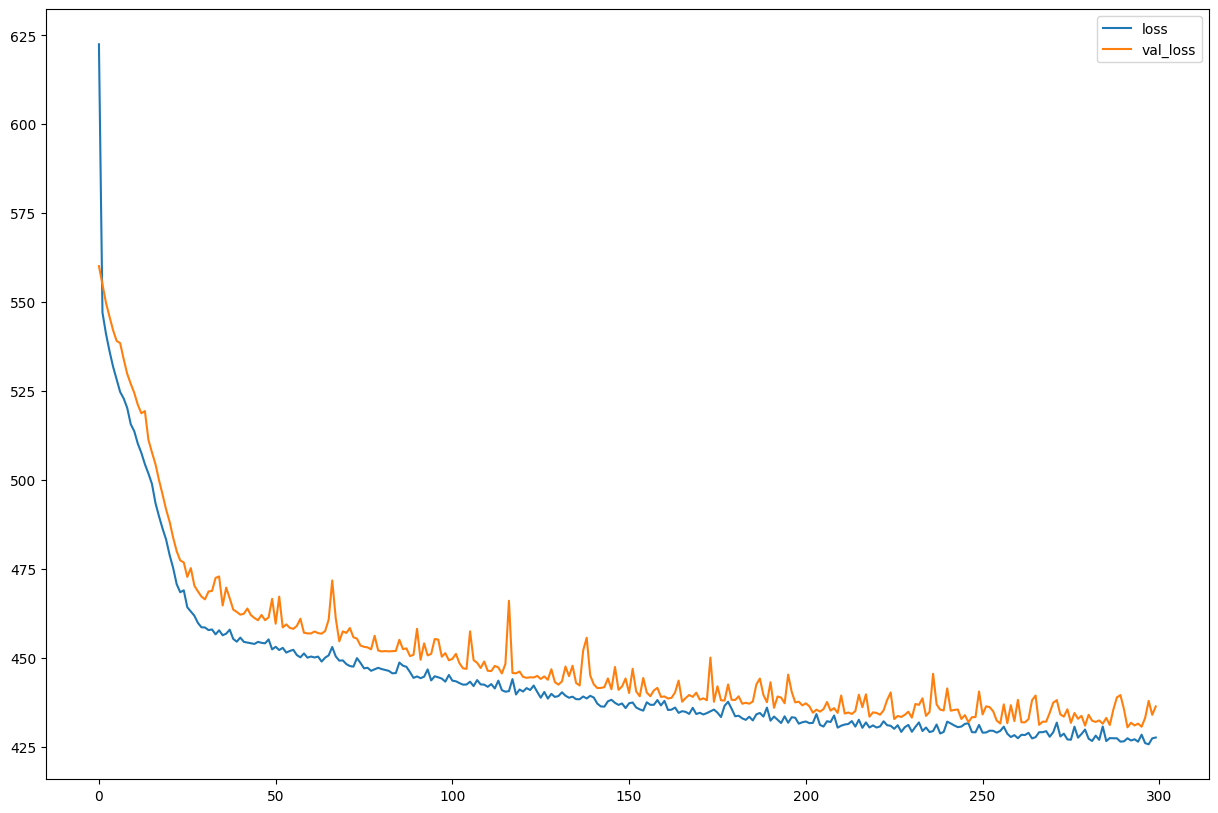

In [6]:
# Let's visualize our model performance
pd.DataFrame(NN_model.history.history).plot(figsize=(15,10))

**Comments:** _In our iterative training attempts, notable improvements in model performance are evident, characterized by a consistent decrease in both training and validation losses. This trend persists until the 200th epoch, beyond which the model stabilizes._ 

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
# Let's see some metrics
predictions = NN_model.predict(X_test) #here the trained algorithm makes predictions
print("The Absolute Mean Error :",mean_absolute_error(y_test, predictions))
print("The Mean Square Error (MSE) :",mean_squared_error(y_test, predictions))

140/140 [==============================] - 0s 932us/step
The Absolute Mean Error : 17.03991396547482
The Mean Square Error (MSE) : 436.34983720841865


**Comments:** _As expected, the Neural Network model falls short of surpassing the Random Forest in handling structured data (RF's MSE is 430). Despite this outcome, the attempt to explore alternative models is commendable. It reinforces the recognition that model selection should align with the inherent characteristics of the dataset._

## 3. Retrain the Random Forest model
_At this point, my focus turns towards optimizing the Random Forest model's performance. By selectively excluding irrelevant features and incorporating potentially overlooked ones into the dataset, I aim to refine the model further. This strategic adjustment is undertaken with the expectation of achieving improved results in our pursuit of enhanced predictive accuracy._
_According to the results of the ***formula*** to create a hit by **fgjspaceman** on [Kaggle](https://www.kaggle.com/code/franoisgeorgesjulien/spotify-1-what-does-it-take-to-hit-the-charts), I know that "Mode, Key and BPM play a bigger role than the rest."_

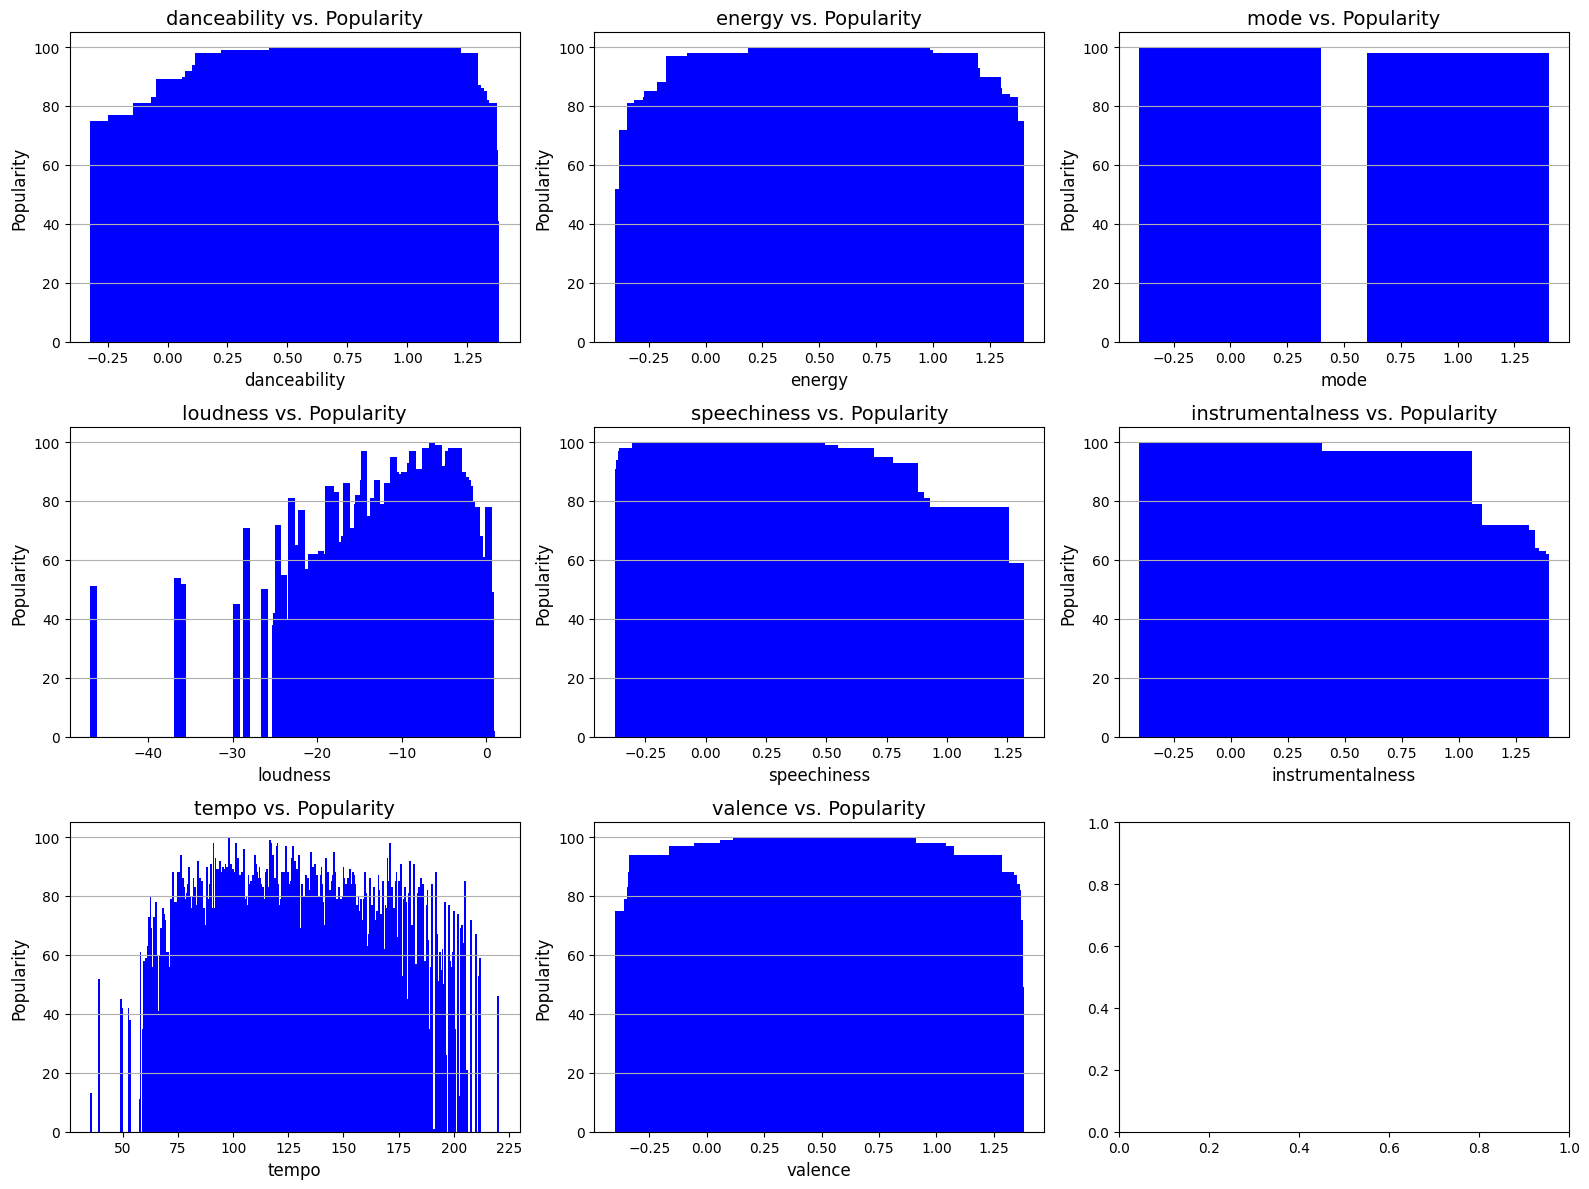

In [8]:
# Let's take a look back at how different features vs. track popularity 
columns_to_plot = ['danceability', 'energy', 'mode', 'loudness', 'speechiness', 'instrumentalness', 'tempo', 'valence']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(raw_data[column], raw_data['track_popularity'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Popularity', fontsize=12)
    plt.title(f'{column} vs. Popularity', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Comments:** _It appears that the "valence" feature may not significantly influence the "track_popularity." In light of this observation, a strategic decision to drop this column and introduce the "key" feature to our training dataset is warranted. This adjustment aligns with the goal of refining our model by excluding less relevant features and incorporating potentially impactful ones._

In [9]:
# Specify the columns to keep for the training part
columns_to_keep = ['track_popularity','danceability','energy','speechiness','loudness','mode','instrumentalness','key','tempo']

# Use loc to select only the specified columns
data1 = raw_data.loc[:, columns_to_keep]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  14925 non-null  int64  
 1   danceability      14925 non-null  float64
 2   energy            14925 non-null  float64
 3   speechiness       14925 non-null  float64
 4   loudness          14925 non-null  float64
 5   mode              14925 non-null  int64  
 6   instrumentalness  14925 non-null  float64
 7   key               14925 non-null  int64  
 8   tempo             14925 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
# Create target object and call it y
Y = data1.track_popularity
# Create X
features = ['danceability','energy','speechiness','loudness','mode','instrumentalness','key','tempo']
X = data1[features]

scaler = RobustScaler()
data = scaler.fit_transform(data.astype(np.float64))
data = scaler.fit_transform(data.astype(np.int64))

#Split into validation and training data
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state= 42)

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

# Search for the best parameters
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9,
                      n_estimators=50)


In [18]:
model_grid = RandomForestRegressor(max_depth=9, max_features=None, max_leaf_nodes=9, n_estimators=50) 
model_grid.fit(x_train, y_train) 
y_pred_grid = model_grid.predict(x_test)
MSE = mean_squared_error(y_test, y_pred_grid)
print(f'Mean Squared Error (Best Parameters) : {MSE:.2f}')

Mean Squared Error (Best Parameters) : 429.80


## 4. Conclusion
In conclusion, the optimal Mean Squared Error (MSE) achieved at 429.80 underscores the complexity of predicting track popularity in the music industry. Despite various attempts within the Kaggle community to model track popularity or streaming counts, the absence of "guaranteed formulas" reinforces the nuanced and multifaceted dynamics that govern the music production stage. According to an article on [Wired](https://www.wired.com/2017/05/secret-hit-making-power-spotify-playlist/), "Spotify, Apple Music, and others have changed the people listen to music. In the process, they've changed the way artists and songs break" by their playlist-created algorithm and the marketing  strategy behind it.